# Aspiraciones de la generación Z

El conjunto de datos "Understanding Career Aspirations of GenZ" en Kaggle analiza las aspiraciones profesionales de la Generación Z en India. Contiene información sobre las expectativas laborales, preferencias de carrera, habilidades deseadas, y la lealtad a los empleadores.

Para medir la lealtad al trabajo, se utiliza la variable objetivo "¿Qué tan probable es que trabaje para un empleador durante 3 años o más?". Esta variable es crucial para entender la estabilidad y retención laboral que los futuros empleados de la Generación Z podrían ofrecer a las empresas.

## Preprocesamiento

In [1]:
#Librerias a Utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
from translate import Translator #traduccion de texto
from scipy.interpolate import interp1d
from collections import Counter

In [2]:
#Funciones que se contruyeron el proceso de analasis y se traen para facilitar el codigo

def reemplazar(data: pd.DataFrame, col: str):
     # Verificar los tipos de los argumentos
    if not isinstance(data, pd.DataFrame):
        raise TypeError("El primer argumento debe ser un DataFrame")
    if not isinstance(col, str):
        raise TypeError("El segundo argumento debe ser una cadena de texto (string)")

    #Diccionario de reemplazos
    reemplazos = {
        'Germany': 'Alemania',
        'United Arab Emirates': 'Emiratos Árabes Unidos',
        'United States of America': 'Estados Unidos',
        'Male': 'Masculino',
        'Female': 'Femenino',
        'My Parents': 'Mis Padres',
        'People who have changed the world for better': 'Personas que cambiaron el mundo para mejor',
        'People from my circle, but not family members': 'Personas de mi circulo, pero no de mi familia',
        'Influencers who had successful careers': 'Influencer con carreras exitosas',
        'Social Media like LinkedIn': 'Redes sociales como LinkedIn',
        'Yes, I will earn and do that': 'Si, ganaría lo suficiente y lo haría',
        'No I would not be pursuing Higher Education outside of India': 'No, no buscaría Educación Superior fuera de la India',
        'No, But if someone could bare the cost I will': 'No, pero si alguien pudiera cubrir el costo lo haría',
        'This will be hard to do, but if it is the right company I would try': 'Eso sería dificil, pero si es la compañía correcta lo intentaría',
        'Will work for 3 years or more': 'Trabajaría por 3 años o más',
        'No way, 3 years with one employer is crazy': 'De ninguna forma, 3 años con un empleador es para volverse loco',
        'Yes': 1,
        'No': 0,
        'Will NOT work for them': 0,
        'Will work for them':  1,
        'Fully Remote with Options to travel as and when needed': 'Completamente remoto con opciones de viajar cuando sea necesario',
        'Hybrid Working Environment with less than 15 days a month at office': 'Entorno de trabajo híbrido con menos de 15 días al mes en la oficina',
        'Every Day Office Environment': 'Entorno de oficina todos los días',
        'Hybrid Working Environment with less than 10 days a month at office': 'Entorno de trabajo híbrido con menos de 10 días al mes en la oficina',
        'Hybrid Working Environment with less than 3 days a month at office': 'Entorno de trabajo híbrido con menos de 3 días al mes en la oficina',
        'Fully Remote with No option to visit offices': 'Completamente remoto sin opción de visitar oficinas',
        'Employer who pushes your limits by enabling an learning environment, and rewards you at the end': 'Empleador que te lleva al límite proporcionando un entorno de aprendizaje y te recompensa al final',
        'Employer who appreciates learning and enables that environment': 'Empleador que aprecia el aprendizaje y facilita ese entorno',
        'Employer who rewards learning and enables that environment': 'Empleador que recompensa el aprendizaje y facilita ese entorno',
        "Employer who pushes your limits and doesn't enables learning environment and never rewards you": 'Empleador que te lleva al límite pero no proporciona un entorno de aprendizaje y nunca te recompensa',
        "Employers who appreciates learning but doesn't enables an learning environment": 'Empleador que aprecia el aprendizaje pero no proporciona un entorno de aprendizaje',
        'Self Paced Learning Portals, Instructor or Expert Learning Programs': 'Portales de aprendizaje autodirigido, Programas de aprendizaje con instructor o experto',
        'Instructor or Expert Learning Programs, Trial and error by doing side projects within the company': 'Programas de aprendizaje con instructor o experto, Prueba y error haciendo proyectos paralelos dentro de la empresa',
        'Instructor or Expert Learning Programs, Learning by observing others': 'Programas de aprendizaje con instructor o experto, Aprendizaje observando a otros',
        'Self Paced Learning Portals, Learning by observing others' : 'Portales de aprendizaje autodirigido, Aprendizaje observando a otros',
        'Learning by observing others, Trial and error by doing side projects within the company': 'Aprendizaje observando a otros, Prueba y error haciendo proyectos paralelos dentro de la empresa',
        'Self Paced Learning Portals, Trial and error by doing side projects within the company': 'Portales de aprendizaje autodirigido, Prueba y error haciendo proyectos paralelos dentro de la empresa',
        'Design and Creative strategy in any company': 'Estrategia de diseño y creatividad en cualquier empresa',
        'Look deeply into Data and generate insights': 'Analizar datos profundamente y generar insights',
        'Business Operations in any organization': 'Operaciones comerciales en cualquier organización',
        'Manage and drive End-to-End Projects or Products' : 'Gestionar y dirigir proyectos o productos de principio a fin',
        'Build and develop a Team': 'Construir y desarrollar un equipo',
        'Teaching in any of the institutes/online or Offline': 'Enseñar en cualquier institución (en línea o presencial)',
        'Work as a freelancer and do my thing my way': 'Trabajar como freelancer y hacer las cosas a mi manera',
        'Design and Develop amazing software': 'Diseñar y desarrollar software increíble',
        'Become a content Creator in some platform': 'Convertirse en un creador de contenido en alguna plataforma',
        'Work in a BPO setup for some well known client': 'Trabajar en un centro de atención al cliente para algún cliente conocido',
        'Manager who explains what is expected, sets a goal and helps achieve it': 'Gerente que explica lo que se espera, establece un objetivo y ayuda a alcanzarlo',
        'Manager who clearly describes what she/he needs': 'Gerente que describe claramente lo que necesita',
        'Manager who sets goal and helps me achieve it': 'Gerente que establece un objetivo y me ayuda a alcanzarlo',
        'Manager who sets targets and expects me to achieve it' : 'Gerente que establece objetivos y espera que los logre',
        'Manager who sets unrealistic targets': 'Gerente que establece objetivos inalcanzables',
        'Work with 5 to 6 people in my team': 'Trabajar con 5 a 6 personas en mi equipo',
        'Work with 2 to 3 people in my team': 'Trabajar con 2 a 3 personas en mi equipo',
        'Work alone': 'Trabajar solo',
        'Work with more than 10 people in my team' : 'Trabajar con más de 10 personas en mi equipo',
        'Work with 7 to 10 or more people in my team': 'Trabajar con 7 a 10 o más personas en mi equipo'
    }

    
    # Reemplazar valores dentro de la columna 'PaisActual' utilizando el diccionario
    data[col] = data[col].replace(reemplazos)
    return data[col]
    

In [3]:
#Cargamos el dataset
df = pd.read_csv(r"C:\Users\ocata\OneDrive\Documentos\JupiterNotebook\ProyectoM7\Your Career Aspirations of GenZ.csv")

#Verificamos si el data esta correcto
df.head(3)

,Your Current Country.,Your Current Zip Code / Pin Code,Your Gender,Which of the below factors influence the most about your career aspirations ?,Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,How likely is that you will work for one employer for 3 years or more ?,Would you work for a company whose mission is not clearly defined and publicly posted.,How likely would you work for a company whose mission is misaligned with their public actions or even their product ?,How likely would you work for a company whose mission is not bringing social impact ?,What is the most preferred working environment for you.,Which of the below Employers would you work with.,Which type of learning environment that you are most likely to work in ?,Which of the below careers looks close to your Aspirational job ?,What type of Manager would you work without looking into your watch ?,Which of the following setup you would like to work ?
0,India,273005,Male,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,4,Fully Remote with No option to visit offices,Employer who rewards learning and enables that...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...","Work alone, Work with 2 to 3 people in my team..."
1,India,851129,Male,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,1,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Instructor or Exp...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team
2,India,123106,Female,Social Media like LinkedIn,"Yes, I will earn and do that",Will work for 3 years or more,Yes,Will work for them,7,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Trial and error b...",Manage and drive End-to-End Projects or Produc...,"Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."


In [4]:
#Desglamos la información general del Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 15 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   Your Current Country.                                                                                                     235 non-null    object
 1   Your Current Zip Code / Pin Code                                                                                          235 non-null    int64 
 2   Your Gender                                                                                                               235 non-null    object
 3   Which of the below factors influence the most about your career aspirations ?                                             235 non-null    ob

In [5]:
#Verificamos tipos de datos que contiene
print('Las categorias de las columnas se distribuyen de la siguinte forma:')
print(f'\n{df.dtypes.value_counts()}')

Las categorias de las columnas se distribuyen de la siguinte forma:

object    13
int64      2
Name: count, dtype: int64


In [6]:
#Verificamos el grado de completitud
print(f'El porcentaje de completitud del dataset es de {df.count().sum()/df.size*100:.3f}%')

El porcentaje de completitud del dataset es de 100.000%


In [7]:
#Guardamos los nombres de las columnas en una variable
columnas = df.columns
print(columnas)

Index(['Your Current Country.', 'Your Current Zip Code / Pin Code',
       'Your Gender',
       'Which of the below factors influence the most about your career aspirations ?',
       'Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.',
       'How likely is that you will work for one employer for 3 years or more ?',
       'Would you work for a company whose mission is not clearly defined and publicly posted.',
       'How likely would you work for a company whose mission is misaligned with their public actions or even their product ?',
       'How likely would you work for a company whose mission is not bringing social impact ?',
       'What is the most preferred working environment for you.',
       'Which of the below Employers would you work with.',
       'Which type of learning environment that you are most likely to work in ?',
       'Which of the below careers looks close to your Aspirational job ?',
   

In [8]:
# Inicializar el Traslator para traducir el nombre de las columnas
traductor = Translator(to_lang="es")

# Traducir las columnas categóricas
columnas_traducidas = []
for col in columnas:
    traduccion = traductor.translate(col)
    columnas_traducidas.append(traduccion)
    print(traduccion)


País actual
Su código postal/código PIN actual
Género
¿Cuál de los siguientes factores influye más en sus aspiraciones profesionales?
¿Definitivamente seguiría una educación superior/ posgrado fuera de la India ? Si solo tienes que auto-patrocinarlo.
¿Qué tan probable es que trabaje para un empleador durante 3 años o más ?
¿Trabajaría para una empresa cuya misión no está claramente definida y publicada públicamente?
¿Qué tan probable es que trabaje para una empresa cuya misión no esté alineada con sus acciones públicas o incluso con su producto ?
¿Qué tan probable es que trabaje para una empresa cuya misión no es generar impacto social?
¿Cuál es el entorno de trabajo que más le gusta?
¿Con cuál de los siguientes empleadores trabajaría?
¿En qué tipo de entorno de aprendizaje es más probable que trabaje?
¿Cuál de las siguientes carreras se parece a su trabajo de Aspirational?
¿Qué tipo de gerente trabajarías sin mirar tu reloj ?
¿En cuál de las siguientes configuraciones le gustaría trab

In [9]:
#Para un mejor manejo de las columnas se reemplazaras por codigo que representen la pregunta de la encuenta
# Renombrar las columnas
new_column_names = {
    'Your Current Country.': 'PaisActual',
    'Your Current Zip Code / Pin Code': 'CodigoPostalActual',
    'Your Gender': 'Genero',
    'Which of the below factors influence the most about your career aspirations ?': 'FactoresInfluenciaCarrera',
    'Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.': 'EducacionSuperiorExtranjero',
    'How likely is that you will work for one employer for 3 years or more ?': 'ProbabilidadLealtadLaboral',
    'Would you work for a company whose mission is not clearly defined and publicly posted.': 'TrabajariaEmpresaMisionNoDefinida',
    'How likely would you work for a company whose mission is misaligned with their public actions or even their product ?': 'ProbabilidadTrabajarMisionDesalineada',
    'How likely would you work for a company whose mission is not bringing social impact ?': 'ProbabilidadTrabajarSinImpactoSocial',
    'What is the most preferred working environment for you.': 'EntornoTrabajoPreferido',
    'Which of the below Employers would you work with.': 'EmpleadoresPreferidos',
    'Which type of learning environment that you are most likely to work in ?': 'EntornoAprendizajePreferido',
    'Which of the below careers looks close to your Aspirational job ?': 'CarreraAspiracional',
    'What type of Manager would you work without looking into your watch ?': 'TipoGerentePreferido',
    'Which of the following setup you would like to work ?': 'ConfiguracionPreferida'
}

df = df.rename(columns=new_column_names)
df.head(1)

,PaisActual,CodigoPostalActual,Genero,FactoresInfluenciaCarrera,EducacionSuperiorExtranjero,ProbabilidadLealtadLaboral,TrabajariaEmpresaMisionNoDefinida,ProbabilidadTrabajarMisionDesalineada,ProbabilidadTrabajarSinImpactoSocial,EntornoTrabajoPreferido,EmpleadoresPreferidos,EntornoAprendizajePreferido,CarreraAspiracional,TipoGerentePreferido,ConfiguracionPreferida
0,India,273005,Male,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,4,Fully Remote with No option to visit offices,Employer who rewards learning and enables that...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...","Work alone, Work with 2 to 3 people in my team..."


## Revisión de Columnas

A continuación se procederá a realizar un analisis de cada columna de manera de interiorizarnos de sus contenido e información de relevacia para el presente trabajo.

### 1.-Columna 'PaisActual' (Your Current Country) 

In [10]:
#Verificamos los valores contenidos en la columna
df['PaisActual'].value_counts()

PaisActual
India                       231
Germany                       2
United Arab Emirates          1
United States of America      1
Name: count, dtype: int64

In [11]:
#Esta parte del codigo se llevo a la funcion reemplazar:

#Diccionario de reemplazos
# reemplazos = {
#     'Germany': 'Alemania',
#     'United Arab Emirates': 'Emiratos Árabes Unidos',
#     'United States of America': 'Estados Unidos',
# }

# # Reemplazar valores dentro de la columna 'PaisActual' utilizando el diccionario
# df['PaisActual'] = df['PaisActual'].replace(reemplazos)

# pais_counts = df['PaisActual'].value_counts()

# # Mostrar el DataFrame modificado
# print(pais_counts)

df['PaisActual'] = reemplazar(df,'PaisActual')

pais_counts = df['PaisActual'].value_counts()

pais_counts



PaisActual
India                     231
Alemania                    2
Emiratos Árabes Unidos      1
Estados Unidos              1
Name: count, dtype: int64

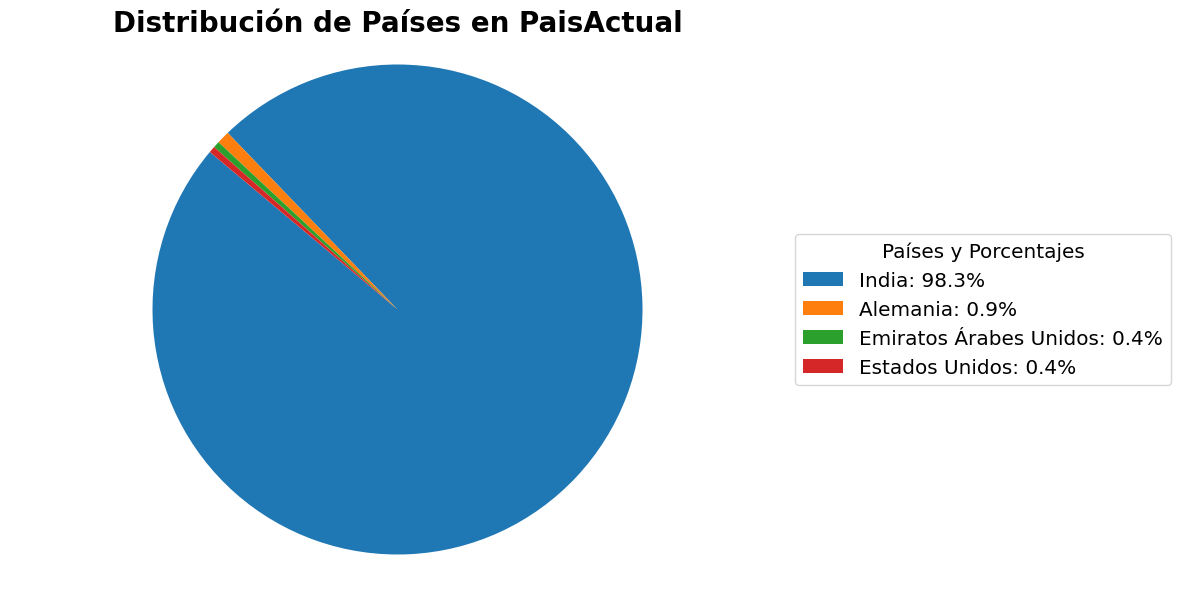

In [12]:
#Representamos en grafico de torta los datos anteriores
# Crear el gráfico de torta sin porcentajes y sin etiquetas
plt.figure(figsize=(10, 7))
wedges, _ = plt.pie(pais_counts, startangle=140)

# Añadir una leyenda con los porcentajes y duplicar su tamaño
pct_labels = [f'{label}: {pct:.1f}%' for label, pct in zip(pais_counts.index, 100 * pais_counts / pais_counts.sum())]
plt.legend(wedges, pct_labels, title="Países y Porcentajes", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='x-large', title_fontsize='x-large')

# Título y ajuste del gráfico
plt.title('Distribución de Países en PaisActual', fontsize=20, fontweight='bold')
plt.axis('equal')  # Asegura que el gráfico sea un círculo

# Mostrar el gráfico
plt.show()


### 2.-Columna 'CodigoPostalActual' (Your Current Zip Code / Pin Code)

In [13]:
# Para representar visualmmente la columna se realizo un grafico geolocalizacion

# Inicializar el geocodificador
geolocator = Nominatim(user_agent="geoapiExercises")

# Valores de CodigoPostalActual a omitir ya que se comprobo que estos datos marcan error
omit_values = [101201, 1234, 27287, 2004]

# Filtrar el DataFrame para omitir los valores especificados
df_filtered = df[~df['CodigoPostalActual'].isin(omit_values)]

# Geocodificación utilizando tanto el país como el código postal
def geocode(row):
    try:
        location = geolocator.geocode(f"{row['CodigoPostalActual']}, {row['PaisActual']}")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

# Aplicar la geocodificación a las filas del DataFrame filtrado
df_filtered[['Latitud', 'Longitud']] = df_filtered.apply(lambda row: pd.Series(geocode(row)), axis=1)

# Filtrar filas con coordenadas válidas
data_geo = df_filtered.dropna(subset=['Latitud', 'Longitud'])

# Crear el mapa
mapa = folium.Map(location=[data_geo['Latitud'].mean(), data_geo['Longitud'].mean()], zoom_start=2)

# Añadir puntos al mapa sin usar el cluster
for _, row in data_geo.iterrows():
    folium.Marker(location=[row['Latitud'], row['Longitud']], popup=f"{row['PaisActual']}, {row['CodigoPostalActual']}").add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save(r'C:\Users\ocata\OneDrive\Desktop\Proyecto7_DS\mapa\mapa_codigos_postales.html')

# Mostrar el mapa (esto puede no funcionar en algunos entornos de notebook directamente)
mapa


C:\Users\ocata\AppData\Local\Temp\ipykernel_5988\1589643438.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Latitud', 'Longitud']] = df_filtered.apply(lambda row: pd.Series(geocode(row)), axis=1)
C:\Users\ocata\AppData\Local\Temp\ipykernel_5988\1589643438.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Latitud', 'Longitud']] = df_filtered.apply(lambda row: pd.Series(geocode(row)), axis=1)


Se observa un distribución de los datos homegenea por todo el territorio de la India, con algunas agrupaciones menores en los centros urbanos más importantes.  

### 3.-Columna 'Genero' (Your Gender)


In [14]:
df['Genero'].value_counts()

Genero
Male      156
Female     79
Name: count, dtype: int64

In [15]:
#Utilizamos la funcion reemplazar
df['Genero'] = reemplazar(df,'Genero')
df['Genero'].value_counts()

Genero
Masculino    156
Femenino      79
Name: count, dtype: int64

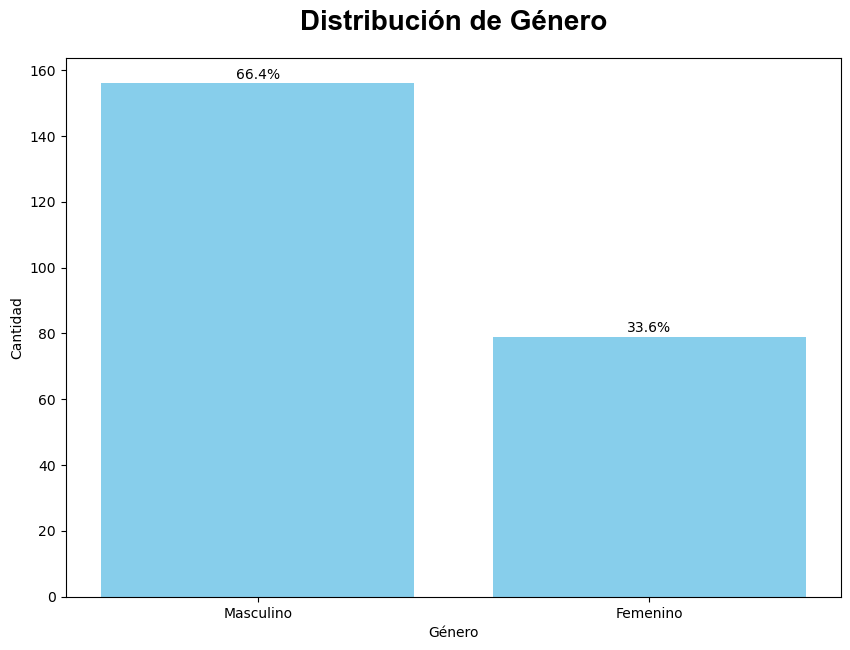

In [16]:
#Graficamos la distribución de los datos
# Contar los valores en la columna 'Your Gender'
gender_counts = df['Genero'].value_counts()

# Calcular los porcentajes
gender_percentages = 100 * gender_counts / gender_counts.sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 7))
bars = plt.bar(gender_counts.index, gender_counts.values, color='skyblue')

# Añadir las etiquetas de porcentaje encima de cada barra
for bar, percentage in zip(bars, gender_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

# Configuración del gráfico
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de Género', fontsize=20, fontweight='bold', loc='center', pad=20, style='normal', fontname='Arial')
plt.show()



### 4.-Columna 'FactoresInfluenciaCarrera' (Which of the below factors influence the most about your career aspirations)

In [17]:
df['FactoresInfluenciaCarrera'].value_counts()

FactoresInfluenciaCarrera
My Parents                                       79
People who have changed the world for better     57
People from my circle, but not family members    39
Influencers who had successful careers           37
Social Media like LinkedIn                       23
Name: count, dtype: int64

In [18]:
#Utilizamos la función reemplazar
df['FactoresInfluenciaCarrera'] = reemplazar(df,'FactoresInfluenciaCarrera')

factorInfl_counts = df['FactoresInfluenciaCarrera'].value_counts()

print(factorInfl_counts) 



FactoresInfluenciaCarrera
Mis Padres                                       79
Personas que cambiaron el mundo para mejor       57
Personas de mi circulo, pero no de mi familia    39
Influencer con carreras exitosas                 37
Redes sociales como LinkedIn                     23
Name: count, dtype: int64


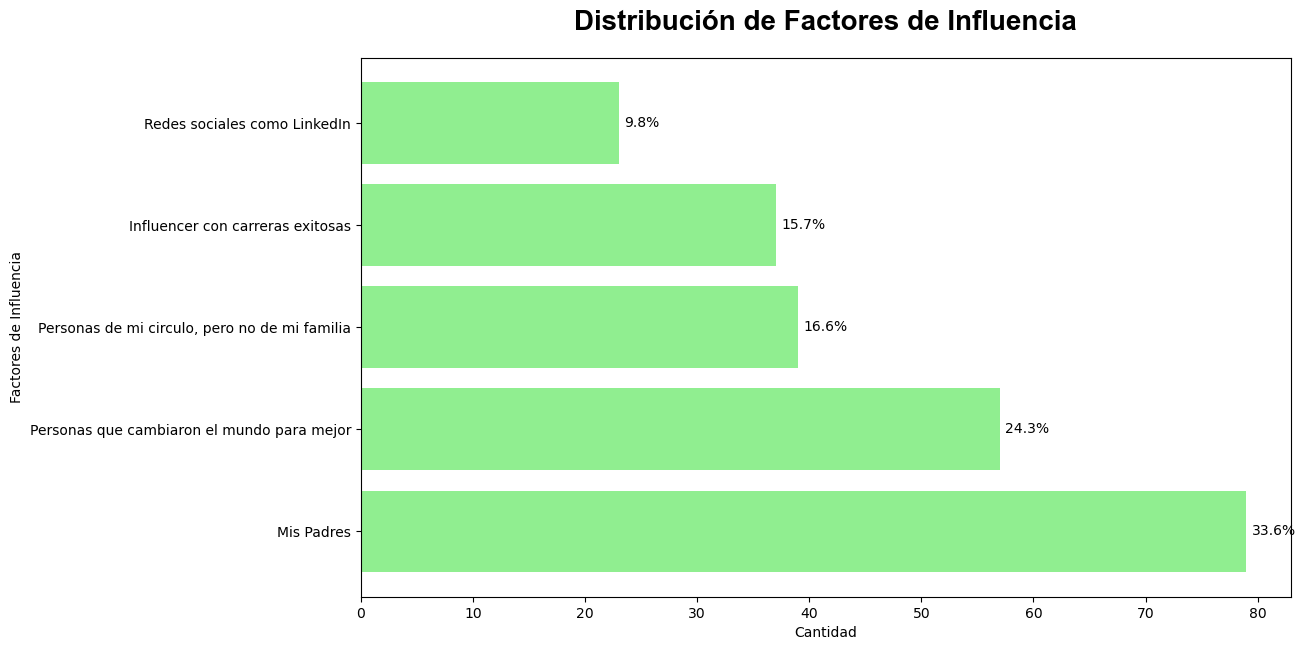

In [19]:
# Graficamos la distribución de los datos

# Calcular los porcentajes
factorInfl_percentages = 100 * factorInfl_counts / factorInfl_counts.sum()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 7))
bars = plt.barh(factorInfl_counts.index, factorInfl_counts.values, color='lightgreen')

# Añadir las etiquetas de porcentaje a la derecha de cada barra
for bar, percentage in zip(bars, factorInfl_percentages):
    xval = bar.get_width()
    plt.text(xval + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', ha='left', va='center')

# Configuración del gráfico
plt.xlabel('Cantidad')
plt.ylabel('Factores de Influencia')
plt.title('Distribución de Factores de Influencia', fontsize=20, fontweight='bold', loc='center', pad=20, style='normal', fontname='Arial')
plt.show()



### 5.-Columna 'EducacionSuperiorExtranjero' (¿Definitivamente seguiría una educación superior/ posgrado fuera de la India ? Si solo tienes que auto-patrocinarlo//Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.')

In [20]:
df['EducacionSuperiorExtranjero'].value_counts()

EducacionSuperiorExtranjero
Yes, I will earn and do that                                    110
No I would not be pursuing Higher Education outside of India     65
No, But if someone could bare the cost I will                    60
Name: count, dtype: int64

In [21]:
# utilizamos la funcion reemplazar
df['EducacionSuperiorExtranjero'] = reemplazar(df,'EducacionSuperiorExtranjero')

EduExtr_counts = df['EducacionSuperiorExtranjero'].value_counts()

print(EduExtr_counts) 

EducacionSuperiorExtranjero
Si, ganaría lo suficiente y lo haría                    110
No, no buscaría Educación Superior fuera de la India     65
No, pero si alguien pudiera cubrir el costo lo haría     60
Name: count, dtype: int64


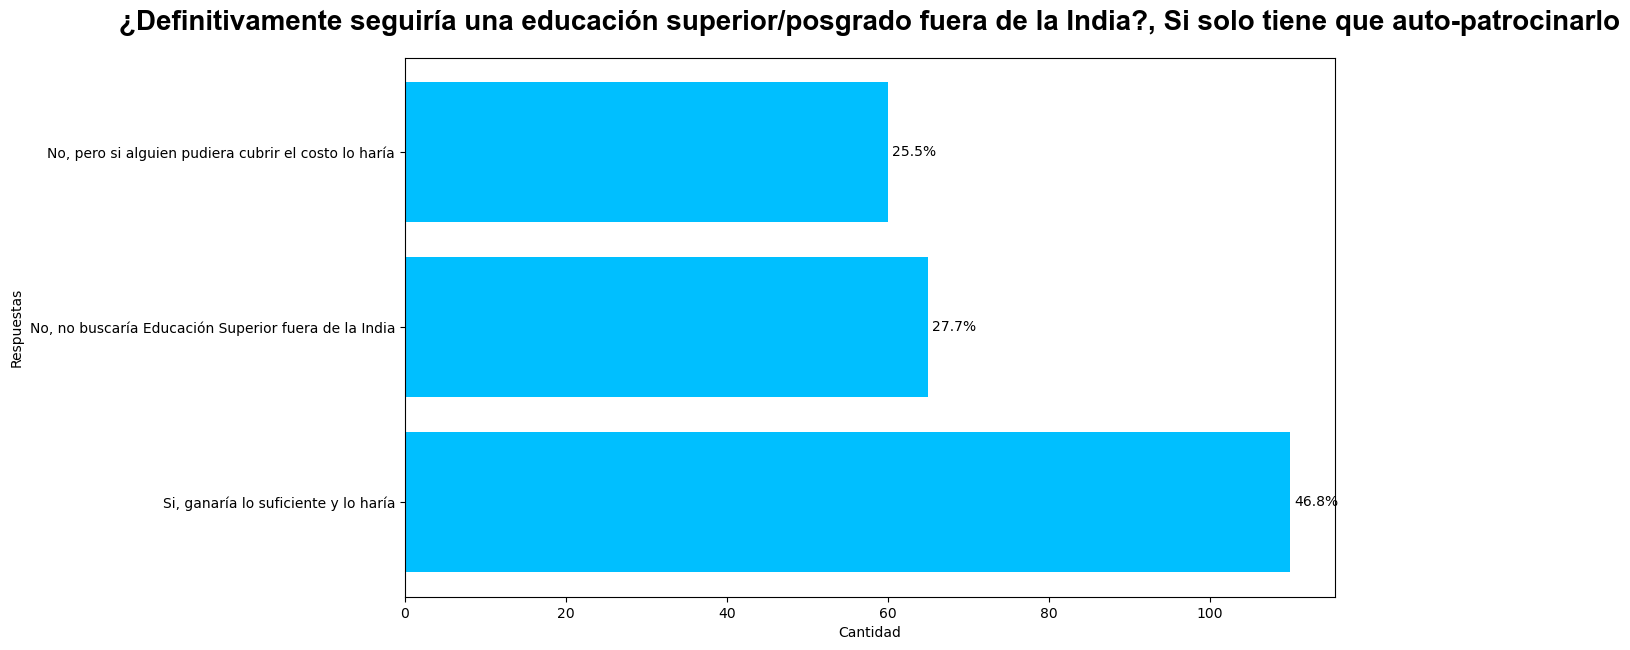

In [22]:
# Graficamos la distribución de los datos

# Calcular los porcentajes
EduExtr_percentages = 100 * EduExtr_counts / EduExtr_counts.sum()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 7))
bars = plt.barh(EduExtr_counts.index, EduExtr_counts.values, color='deepskyblue')

# Añadir las etiquetas de porcentaje a la derecha de cada barra
for bar, percentage in zip(bars, EduExtr_percentages):
    xval = bar.get_width()
    plt.text(xval + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', ha='left', va='center')

# Configuración del gráfico
plt.xlabel('Cantidad')
plt.ylabel('Respuestas')
plt.title('¿Definitivamente seguiría una educación superior/posgrado fuera de la India?, Si solo tiene que auto-patrocinarlo', fontsize=20, fontweight='bold', loc='center', pad=20, style='normal', fontname='Arial')
plt.show()

El 46% de los encuentados mantiene aspiraciones de estudiar en el extranjero inclusive si tiene que autopatrocinarse.

### 6.-Columna 'ProbabilidadLealtadLaboral' (¿Qué tan probable es que trabaje para un empleador durante 3 años o más ? // 'How likely is that you will work for one employer for 3 years or more ?)

In [23]:
df['ProbabilidadLealtadLaboral'].value_counts()

ProbabilidadLealtadLaboral
This will be hard to do, but if it is the right company I would try    139
Will work for 3 years or more                                           79
No way, 3 years with one employer is crazy                              17
Name: count, dtype: int64

In [24]:
#Utilizamos la función reemplazar
df['ProbabilidadLealtadLaboral'] = reemplazar(df,'ProbabilidadLealtadLaboral')

ProbLeal_counts = df['ProbabilidadLealtadLaboral'].value_counts()

print(ProbLeal_counts) 

ProbabilidadLealtadLaboral
Eso sería dificil, pero si es la compañía correcta lo intentaría    139
Trabajaría por 3 años o más                                          79
De ninguna forma, 3 años con un empleador es para volverse loco      17
Name: count, dtype: int64


Existe una alta probabilidad de lealtad laboral por más de tres años, sin embargo, se ve correlacionada al sentimiento de estar trabajando en la _'compañia correcta'_, esta varia será nuetro target para predecir.

### 7.-Columna 'TrabajariaEmpresaMisionNoDefinida'  (¿Trabajaría para una empresa cuya misión no está claramente definida y publicada públicamente?//'Would you work for a company whose mission is not clearly defined and publicly posted.')

In [25]:
#Verificamos los datos de la columna
TrabEmMiNoDef = df['TrabajariaEmpresaMisionNoDefinida'].value_counts()
TrabEmMiNoDef

TrabajariaEmpresaMisionNoDefinida
No     157
Yes     78
Name: count, dtype: int64

In [26]:
#Reemplazamos por valore binarios
df['TrabajariaEmpresaMisionNoDefinida'] = reemplazar(df,'TrabajariaEmpresaMisionNoDefinida')

df['TrabajariaEmpresaMisionNoDefinida'].value_counts()



C:\Users\ocata\AppData\Local\Temp\ipykernel_5988\3871189448.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace(reemplazos)


TrabajariaEmpresaMisionNoDefinida
0    157
1     78
Name: count, dtype: int64

C:\Users\ocata\AppData\Local\Temp\ipykernel_5988\2244840644.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x, y, f"{TrabEmMiNoDef.index[i]}: {TrabEmMiNoDef[i]}", ha='center', va='center', fontsize=2 * plt.rcParams['font.size'])


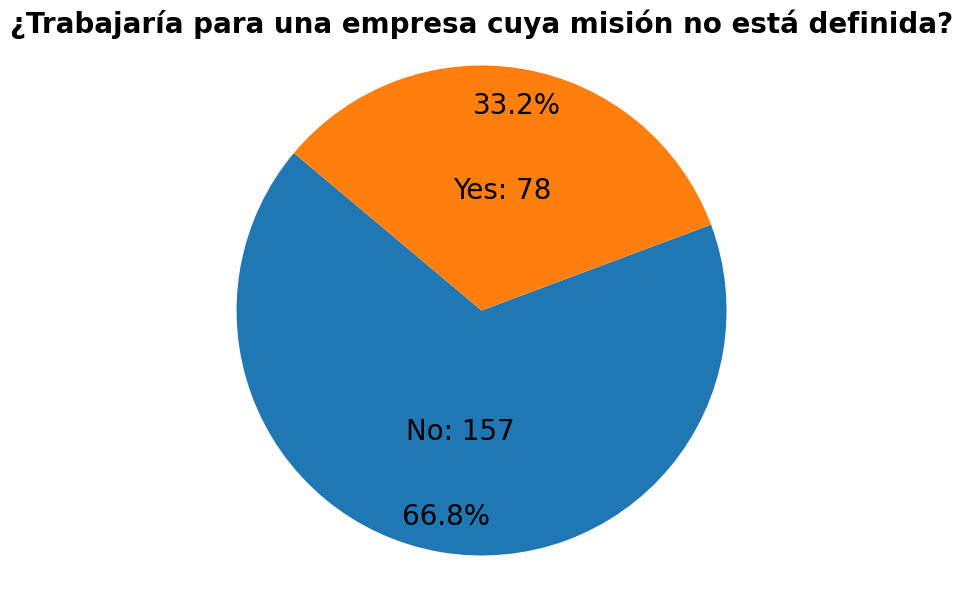

In [27]:
#Graficamos la distribución de los datos
# Crear el gráfico de torta sin porcentajes y sin etiquetas
plt.figure(figsize=(10, 7))
wedges, labels, _ = plt.pie(TrabEmMiNoDef, startangle=140, autopct='%1.1f%%', pctdistance=0.85)

# Ajustar las etiquetas de porcentaje para que estén dentro de los sectores
for label, wedge in zip(labels, wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = 0.85 * wedge.r * np.cos(angle * np.pi / 180)
    y = 0.85 * wedge.r * np.sin(angle * np.pi / 180)
    plt.text(x, y, label.get_text(), ha='center', va='center', fontsize=2 * plt.rcParams['font.size'])

# Ajustar el tamaño del porcentaje
for text in plt.gca().texts:
    if '%' in text.get_text():
        text.set_fontsize(2 * plt.rcParams['font.size'])

# Añadir etiquetas numéricas
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = 0.5 * wedge.r * np.cos(angle * np.pi / 180)
    y = 0.5 * wedge.r * np.sin(angle * np.pi / 180)
    plt.text(x, y, f"{TrabEmMiNoDef.index[i]}: {TrabEmMiNoDef[i]}", ha='center', va='center', fontsize=2 * plt.rcParams['font.size'])

# Título y ajuste del gráfico
plt.title('¿Trabajaría para una empresa cuya misión no está definida?', fontsize=20, fontweight='bold')
plt.axis('equal')  # Asegura que el gráfico sea un círculo

# Mostrar el gráfico
plt.show()





Más de las mitad de las personas sienten que es relevante que la empresa tenga su misión claremente definida para trabajar en ella

### 8.- Columna 'ProbabilidadTrabajarMisionDesalineada' (¿Qué tan probable es que trabaje para una empresa cuya misión no esté alineada con sus acciones públicas o incluso con su producto ? // How likely would you work for a company whose mission is misaligned with their public actions or even their product ?)

In [28]:
ProbTrMiDes_counts= df['ProbabilidadTrabajarMisionDesalineada'].value_counts()
ProbTrMiDes_counts

ProbabilidadTrabajarMisionDesalineada
Will NOT work for them    158
Will work for them         77
Name: count, dtype: int64

In [29]:
# Reemplazar valores dentro de la columna, como se trata de opciones binarias se reemplazpor 0 y 1
df['ProbabilidadTrabajarMisionDesalineada'] = reemplazar(df,'ProbabilidadTrabajarMisionDesalineada')

# Mostrar el DataFrame modificado
print(df['ProbabilidadTrabajarMisionDesalineada'].value_counts()) 

ProbabilidadTrabajarMisionDesalineada
0    158
1     77
Name: count, dtype: int64


C:\Users\ocata\AppData\Local\Temp\ipykernel_5988\3871189448.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace(reemplazos)


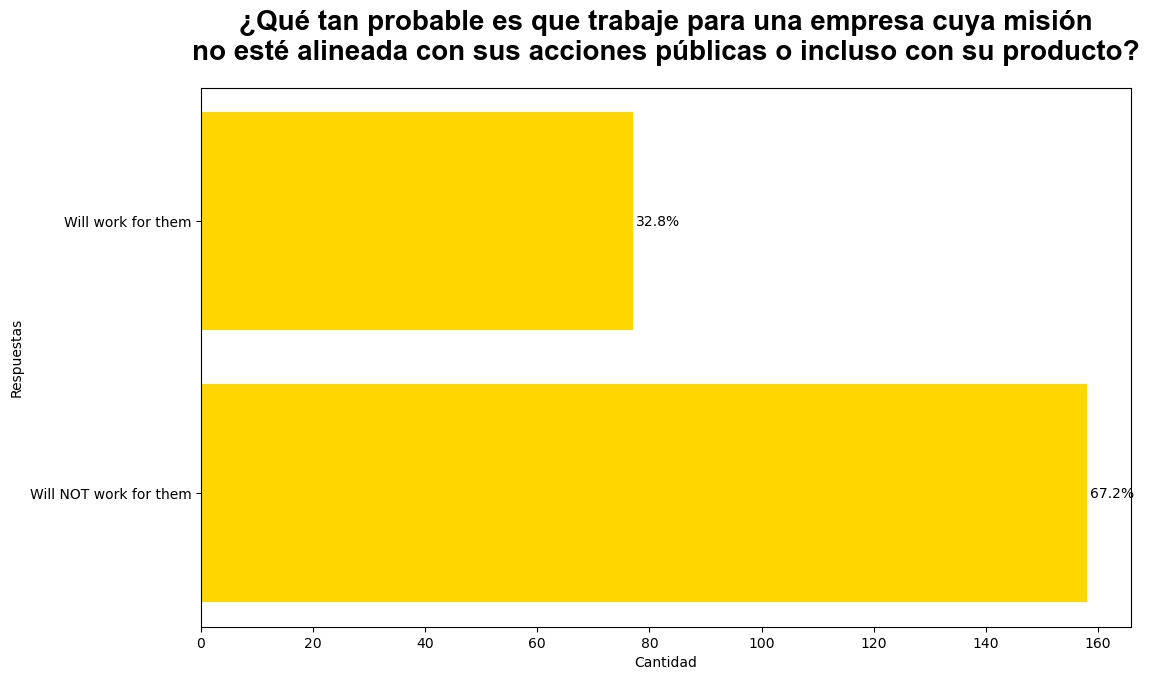

In [30]:
# Graficamos para visualizar la distribución de los datos

# Calcular los porcentajes
ProbTrMiDes_percentages = 100 * ProbTrMiDes_counts / ProbTrMiDes_counts.sum()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 7))
bars = plt.barh(ProbTrMiDes_counts.index, ProbTrMiDes_counts.values, color='gold')

# Añadir las etiquetas de porcentaje a la derecha de cada barra
for bar, percentage in zip(bars, ProbTrMiDes_percentages):
    xval = bar.get_width()
    plt.text(xval + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', ha='left', va='center')

# Configuración del gráfico
plt.xlabel('Cantidad')
plt.ylabel('Respuestas')
plt.title('¿Qué tan probable es que trabaje para una empresa cuya misión\nno esté alineada con sus acciones públicas o incluso con su producto?', fontsize=20, fontweight='bold', loc='center', pad=20, style='normal', fontname='Arial')
plt.show()

### 9.- Columna 'ProbabilidadTrabajarSinImpactoSocial' (¿Qué tan probable es que trabaje para una empresa cuya misión no es generar impacto social? // 'How likely would you work for a company whose mission is not bringing social impact ?') 

In [31]:
#Verificamos la columna
df['ProbabilidadTrabajarSinImpactoSocial'].value_counts()

ProbabilidadTrabajarSinImpactoSocial
5     49
8     34
7     31
6     26
1     25
3     19
4     18
2     16
10    10
9      7
Name: count, dtype: int64

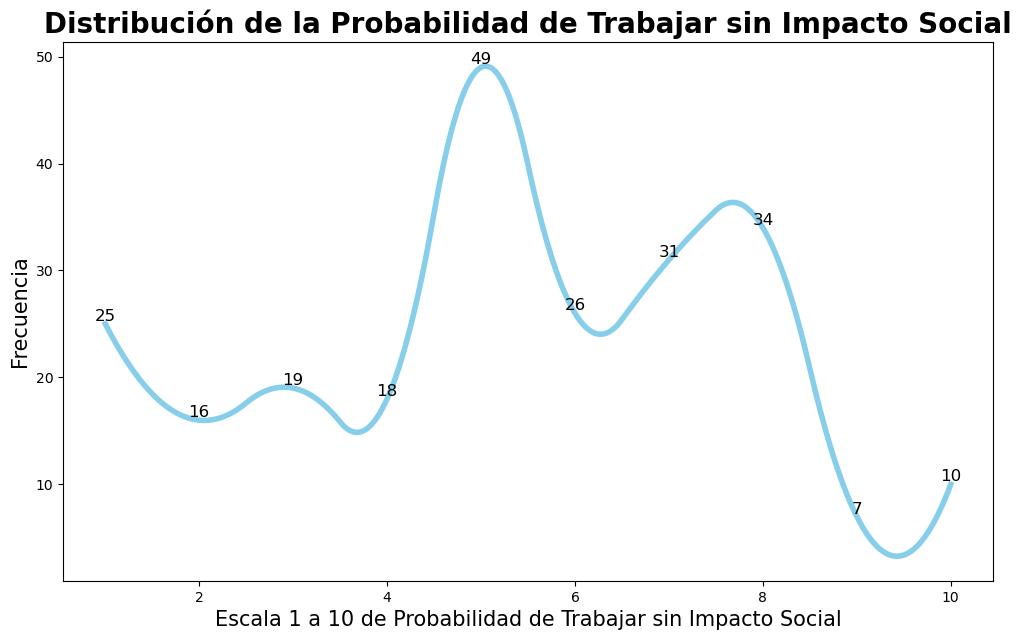

In [32]:
#Graficamos
Probabilidad_counts = df['ProbabilidadTrabajarSinImpactoSocial'].value_counts().sort_index()

# Crear los puntos para interpolar
x = Probabilidad_counts.index
y = Probabilidad_counts.values

# Crear una interpolación suave
x_smooth = np.linspace(x.min(), x.max(), 300)
f = interp1d(x, y, kind='quadratic')
y_smooth = f(x_smooth)

# Crear el gráfico de línea
plt.figure(figsize=(12, 7))
plt.plot(x_smooth, y_smooth, color='skyblue', linewidth=4)  # Engrosar la línea

# Añadir etiquetas y título
plt.xlabel('Escala 1 a 10 de Probabilidad de Trabajar sin Impacto Social', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.title('Distribución de la Probabilidad de Trabajar sin Impacto Social', fontsize=20, fontweight='bold')

# Añadir etiquetas de valor en los puntos de la línea original
for xi, yi in zip(x, y):
    plt.text(xi, yi, str(yi), ha='center', va='bottom', fontsize=12)

# Mostrar el gráfico
plt.show()



Lo que nos muestra la gráfica es la probabilidad de trabajar en un empresa sin impacto social en una escala de 1 al 10, donde 1 es muy baja probabilidad y 10 es una alta probabilidad, concluyendo que hay un mayor grado de indiferencia hacia la pregunta posicionando en una medida central la mayor cantidad de respuestas.

### 10.- Columna 'EntornoTrabajoPreferido' (¿Cuál es el entorno de trabajo que más le gusta? // 'What is the most preferred working environment for you.)

In [33]:
#Verificamos la columna
df['EntornoTrabajoPreferido'].value_counts()

EntornoTrabajoPreferido
Fully Remote with Options to travel as and when needed                 60
Hybrid Working Environment with less than 15 days a month at office    57
Every Day Office Environment                                           50
Hybrid Working Environment with less than 10 days a month at office    31
Hybrid Working Environment with less than 3 days a month at office     26
Fully Remote with No option to visit offices                           11
Name: count, dtype: int64

In [34]:
# Reemplazar valores 
df['EntornoTrabajoPreferido'] = reemplazar(df,'EntornoTrabajoPreferido')

EntTrabPref_counts = df['EntornoTrabajoPreferido'].value_counts()

# Mostrar el DataFrame modificado
print(EntTrabPref_counts)

EntornoTrabajoPreferido
Completamente remoto con opciones de viajar cuando sea necesario        60
Entorno de trabajo híbrido con menos de 15 días al mes en la oficina    57
Entorno de oficina todos los días                                       50
Entorno de trabajo híbrido con menos de 10 días al mes en la oficina    31
Entorno de trabajo híbrido con menos de 3 días al mes en la oficina     26
Completamente remoto sin opción de visitar oficinas                     11
Name: count, dtype: int64


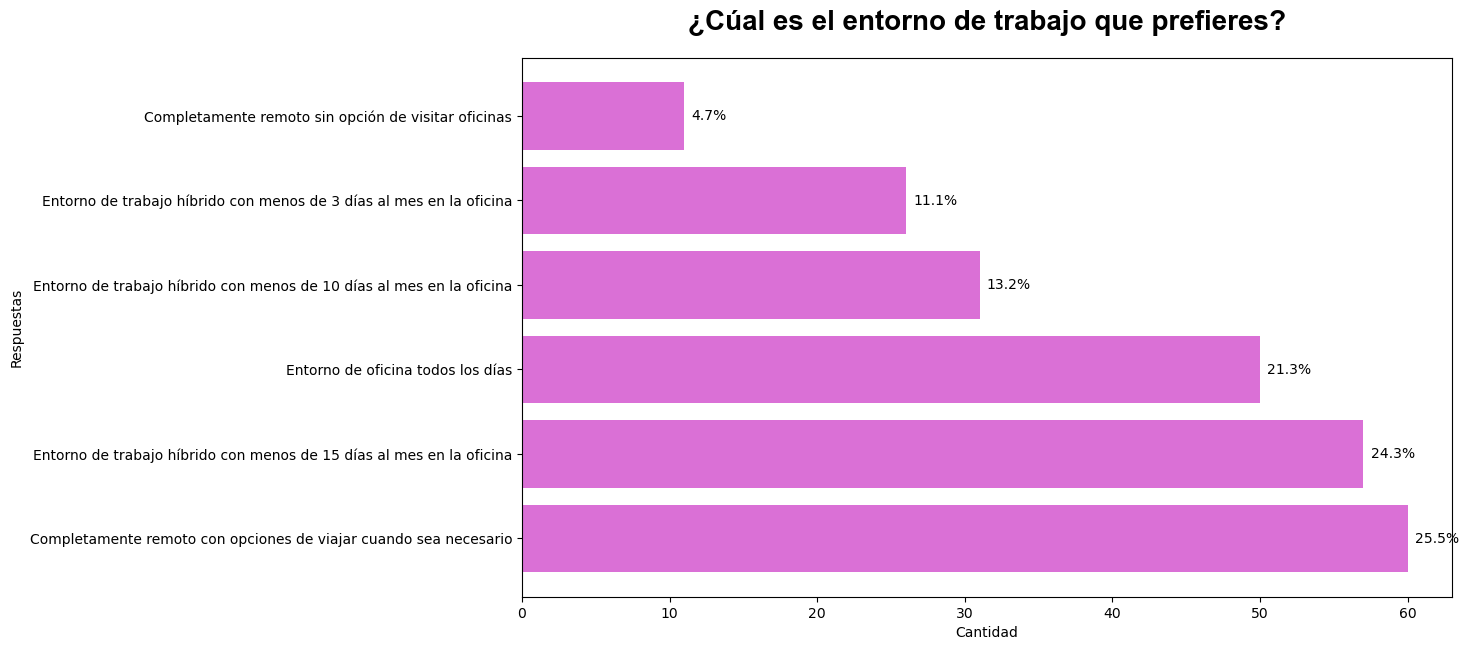

In [35]:
# Graficamos

# Calcular los porcentajes
EntTrabPref_percentages = 100 * EntTrabPref_counts / EntTrabPref_counts.sum()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 7))
bars = plt.barh(EntTrabPref_counts.index, EntTrabPref_counts.values, color='orchid')

# Añadir las etiquetas de porcentaje a la derecha de cada barra
for bar, percentage in zip(bars, EntTrabPref_percentages):
    xval = bar.get_width()
    plt.text(xval + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', ha='left', va='center')

# Configuración del gráfico
plt.xlabel('Cantidad')
plt.ylabel('Respuestas')
plt.title('¿Cúal es el entorno de trabajo que prefieres?', fontsize=20, fontweight='bold', loc='center', pad=20, style='normal', fontname='Arial')
plt.show()

Los datos muestran una clara preferencia por la flexibilidad en el entorno de trabajo. Las opciones que combinan el trabajo remoto con algunas oportunidades de interacción en persona (ya sea a través de viajes o días limitados en la oficina) son las más populares. Las organizaciones que ofrecen estas opciones de trabajo híbrido o remoto con flexibilidad probablemente tendrán una ventaja en atraer y retener talento. La menor popularidad del trabajo completamente remoto sin interacción sugiere que, aunque los empleados valoran la flexibilidad, también aprecian las oportunidades de interacción personal y colaboración en ciertos momentos.

### 11.- Columna 'EmpleadoresPreferidos' (¿Con cuál de los siguientes empleadores trabajaría? // 'Which of the below Employers would you work with.')

In [36]:
#Verificamos la columna
df['EmpleadoresPreferidos'].value_counts()

EmpleadoresPreferidos
Employer who pushes your limits by enabling an learning environment, and rewards you at the end    113
Employer who appreciates learning and enables that environment                                      75
Employer who rewards learning and enables that environment                                          36
Employer who pushes your limits and doesn't enables learning environment and never rewards you       7
Employers who appreciates learning but doesn't enables an learning environment                       4
Name: count, dtype: int64

In [37]:
# Reemplazamos  valores
df['EmpleadoresPreferidos'] = reemplazar(df,'EmpleadoresPreferidos')

EmplPref_counts = df['EmpleadoresPreferidos'].value_counts()

# Mostrar el DataFrame modificado
print(EmplPref_counts)

EmpleadoresPreferidos
Empleador que te lleva al límite proporcionando un entorno de aprendizaje y te recompensa al final      113
Empleador que aprecia el aprendizaje y facilita ese entorno                                              75
Empleador que recompensa el aprendizaje y facilita ese entorno                                           36
Empleador que te lleva al límite pero no proporciona un entorno de aprendizaje y nunca te recompensa      7
Empleador que aprecia el aprendizaje pero no proporciona un entorno de aprendizaje                        4
Name: count, dtype: int64


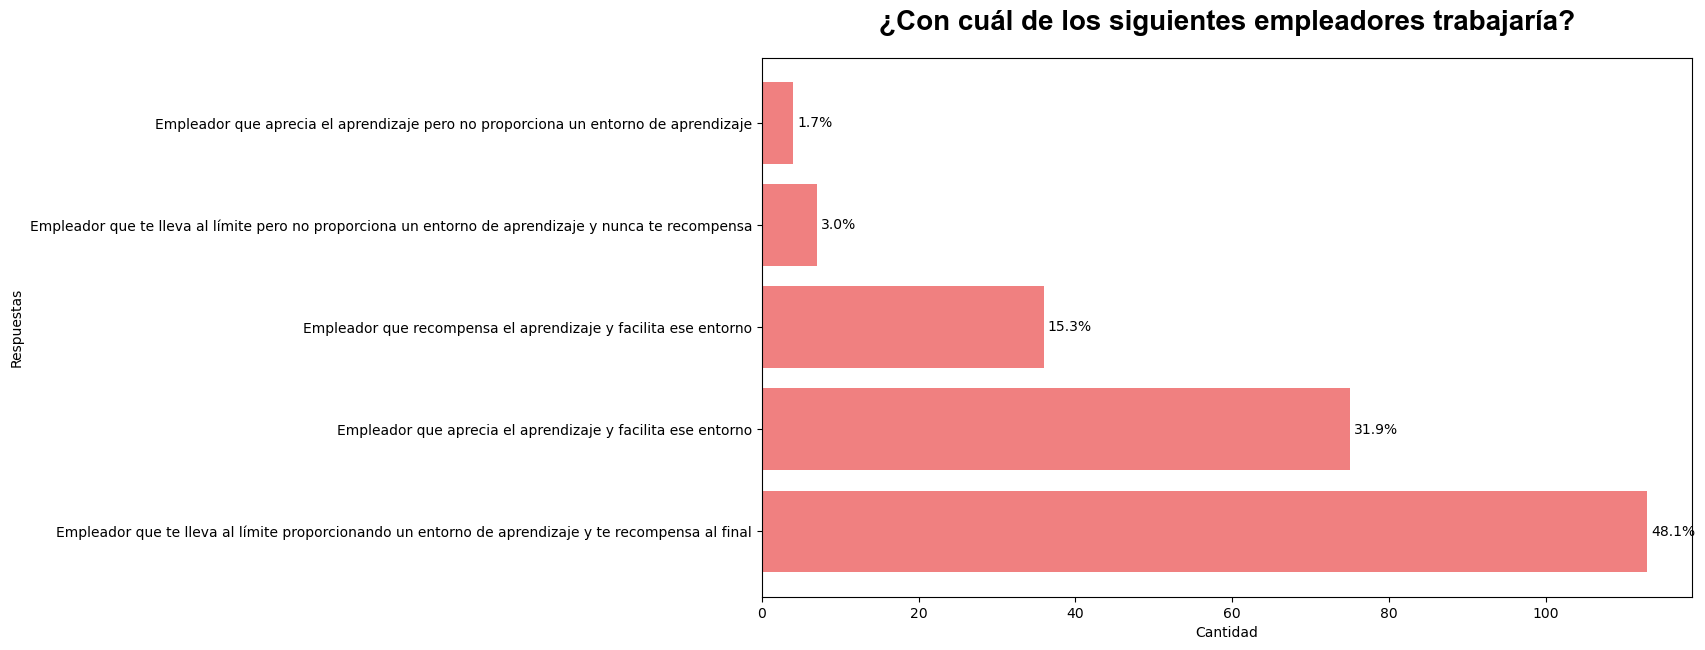

In [38]:
# Graficamos

# Calcular los porcentajes
EmplPref_percentages = 100 * EmplPref_counts / EmplPref_counts.sum()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 7))
bars = plt.barh(EmplPref_counts.index, EmplPref_counts.values, color='lightcoral')

# Añadir las etiquetas de porcentaje a la derecha de cada barra
for bar, percentage in zip(bars, EmplPref_percentages):
    xval = bar.get_width()
    plt.text(xval + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', ha='left', va='center')

# Configuración del gráfico
plt.xlabel('Cantidad')
plt.ylabel('Respuestas')
plt.title('¿Con cuál de los siguientes empleadores trabajaría?', fontsize=20, fontweight='bold', loc='center', pad=20, style='normal', fontname='Arial')
plt.show()

Los empleados valoran los empleadores que les desafían pero que también proporcionan apoyo en forma de un entorno de aprendizaje y recompensas. Esto sugiere que las empresas deben encontrar un equilibrio entre exigir un alto rendimiento y ofrecer recursos y reconocimiento para el desarrollo de sus empleados, falicitando a la vez un entorno de aprendizaje . Los empleadores que aprecian y apoyan el aprendizaje tienen una ventaja significativa en términos de atraer y retener talento.

Las recompensas son tambien importantes, pero no pueden sustituir a un entorno de aprendizaje. Los empleados parecen preferir un entorno de aprendizaje incluso sin recompensas a un entorno con recompensas pero sin aprendizaje.









### 12.- Columna 'EntornoAprendizajePreferido' (¿En qué tipo de entorno de aprendizaje es más probable que trabaje? // 'Which type of learning environment that you are most likely to work in ?')

In [39]:
#Vericamos la columna
df['EntornoAprendizajePreferido'].value_counts()

EntornoAprendizajePreferido
Self Paced Learning Portals, Instructor or Expert Learning Programs                                  59
Instructor or Expert Learning Programs, Trial and error by doing side projects within the company    45
Instructor or Expert Learning Programs, Learning by observing others                                 41
Self Paced Learning Portals, Learning by observing others                                            38
Learning by observing others, Trial and error by doing side projects within the company              29
Self Paced Learning Portals, Trial and error by doing side projects within the company               23
Name: count, dtype: int64

In [40]:
# Reemplazar valores 
df['EntornoAprendizajePreferido'] = reemplazar(df,'EntornoAprendizajePreferido')

EntAprePref_counts = df['EntornoAprendizajePreferido'].value_counts()

# Mostrar el DataFrame modificado
print(EntAprePref_counts)

EntornoAprendizajePreferido
Portales de aprendizaje autodirigido, Programas de aprendizaje con instructor o experto                                59
Programas de aprendizaje con instructor o experto, Prueba y error haciendo proyectos paralelos dentro de la empresa    45
Programas de aprendizaje con instructor o experto, Aprendizaje observando a otros                                      41
Portales de aprendizaje autodirigido, Aprendizaje observando a otros                                                   38
Aprendizaje observando a otros, Prueba y error haciendo proyectos paralelos dentro de la empresa                       29
Portales de aprendizaje autodirigido, Prueba y error haciendo proyectos paralelos dentro de la empresa                 23
Name: count, dtype: int64


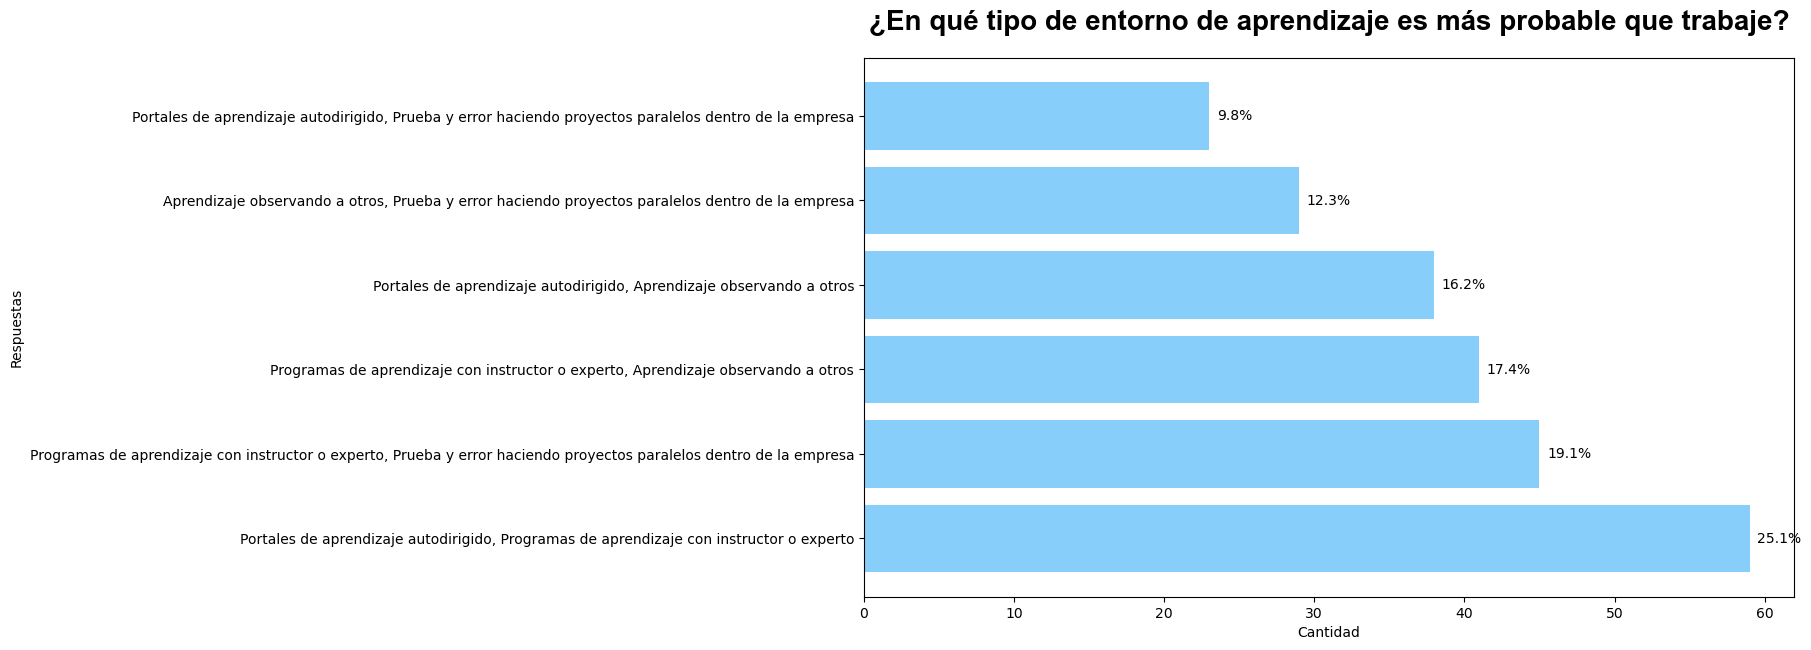

In [41]:
# Graficamos
EntAprePref_percentages = 100 * EntAprePref_counts / EntAprePref_counts.sum()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 7))
bars = plt.barh(EntAprePref_counts.index, EntAprePref_counts.values, color='lightskyblue')

# Añadir las etiquetas de porcentaje a la derecha de cada barra
for bar, percentage in zip(bars, EntAprePref_percentages):
    xval = bar.get_width()
    plt.text(xval + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', ha='left', va='center')

# Configuración del gráfico
plt.xlabel('Cantidad')
plt.ylabel('Respuestas')
plt.title('¿En qué tipo de entorno de aprendizaje es más probable que trabaje?', fontsize=20, fontweight='bold', loc='center', pad=20, style='normal', fontname='Arial')
plt.show()

Los datos de la encuesta indican que los encuestados valoran altamente un enfoque equilibrado en su desarrollo profesional, prefiriendo combinaciones que incluyen la flexibilidad de los portales de aprendizaje autodirigido y la estructura proporcionada por programas guiados por expertos, así como la aplicación práctica a través de proyectos paralelos y el aprendizaje colaborativo observando a otros, lo que refleja una clara necesidad de diversidad en las oportunidades de aprendizaje para maximizar su crecimiento y efectividad en el entorno laboral.

### 13.- Columna 'CarreraAspiracional' (¿Cuál de las siguientes carreras se parece al trabajo que aspira? // 'Which of the below careers looks close to your Aspirational job ?)

In [42]:
#Verificamos la columna
pd.set_option('display.max_rows',30)
CarrAspi = df['CarreraAspiracional'].value_counts()
CarrAspi

CarreraAspiracional
Business Operations in any organization, Manage and drive End-to-End Projects or Products, Look deeply into Data and generate insights        12
Business Operations in any organization, Manage and drive End-to-End Projects or Products, Build and develop a Team                           11
Design and Creative strategy in any company, Teaching in any of the institutes/online or Offline, Business Operations in any organization      9
Business Operations in any organization, Build and develop a Team, Look deeply into Data and generate insights                                 9
Design and Creative strategy in any company, Manage and drive End-to-End Projects or Products, Look deeply into Data and generate insights     8
                                                                                                                                              ..
Teaching in any of the institutes/online or Offline, Manage and drive End-to-End Projects or Products, Build a

Se da cuenta que la esta columna es multivariable y esta compuesta por tres variables diferentes separadas opor comas, que se repiten en diferente orden a traves de la columna, lo que hace dificil su comprensión, los mismo sucede al graficar, lo cual resulta en una visualización incomprensible. 

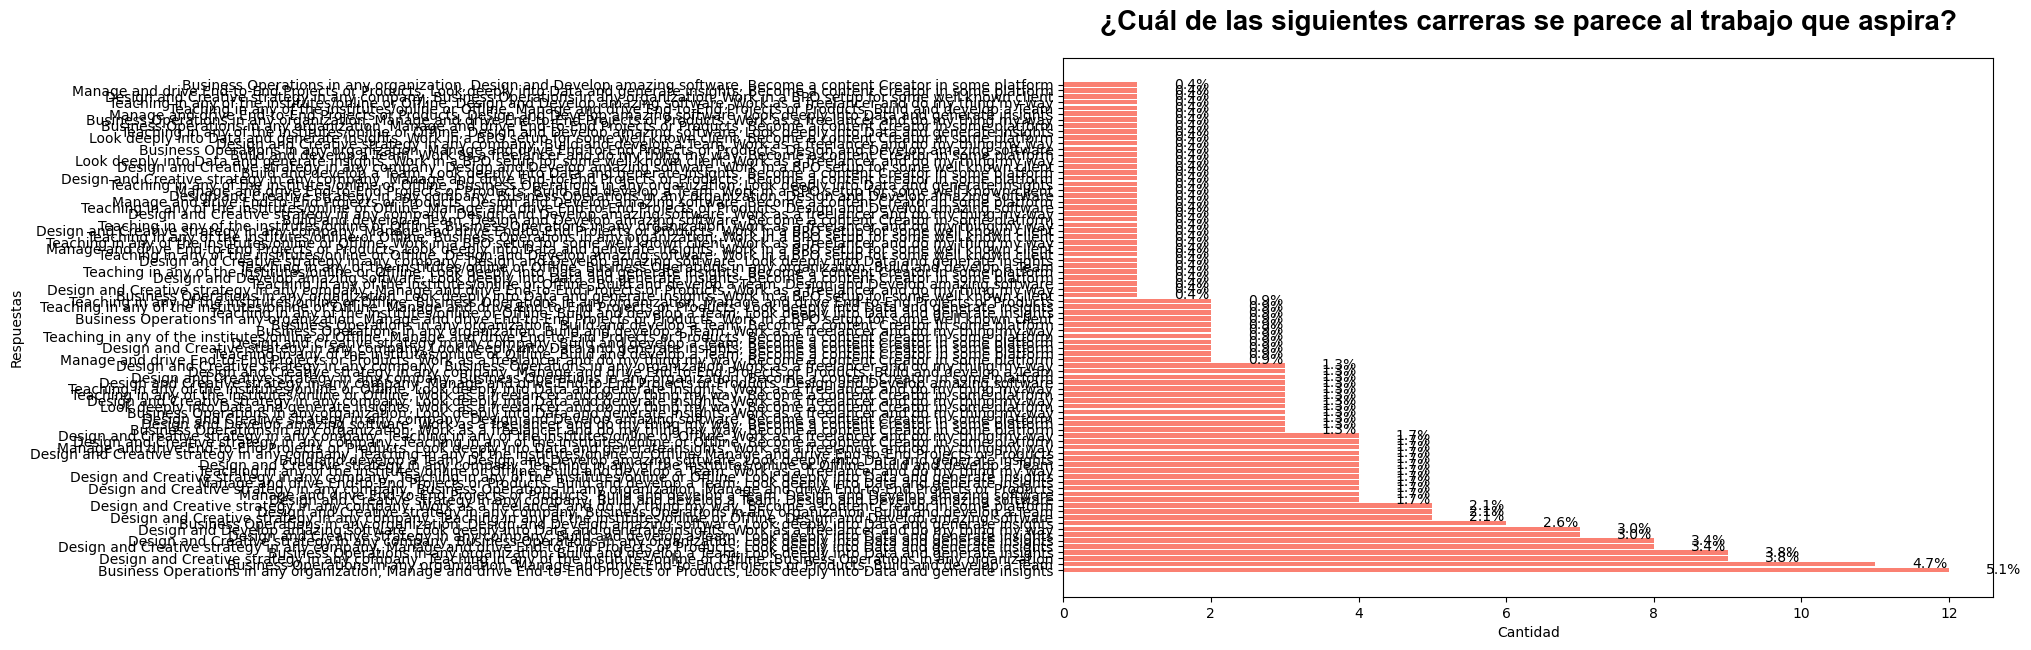

In [43]:
# Graficamos y nos damos cuenta que la información es incompresible
CarrAspi_percentages = 100 * CarrAspi / CarrAspi.sum()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 7))
bars = plt.barh(CarrAspi.index, CarrAspi.values, color='salmon')

# Añadir las etiquetas de porcentaje a la derecha de cada barra
for bar, percentage in zip(bars, CarrAspi_percentages):
    xval = bar.get_width()
    plt.text(xval + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', ha='left', va='center')

# Configuración del gráfico
plt.xlabel('Cantidad')
plt.ylabel('Respuestas')
plt.title('¿Cuál de las siguientes carreras se parece al trabajo que aspira?', fontsize=20, fontweight='bold', loc='center', pad=20, style='normal', fontname='Arial')
plt.show()

In [44]:
#Para solucionar el paso anterior, separamos las variables de la columna contandolas en forma individual 
# Función para contar los elementos individuales
def count_individual_elements(series):
    # Unir todas las filas en una sola cadena grande
    all_elements = ', '.join(series)
    # Dividir la cadena en elementos individuales
    elements_list = all_elements.split(', ')
    # Contar la frecuencia de cada elemento
    element_counts = Counter(elements_list)
    return element_counts

# Aplicar la función a la columna 'CarreraAspiracional'
element_counts = count_individual_elements(df['CarreraAspiracional'])

# Crear un DataFrame a partir del diccionario de conteos
element_counts_df = pd.DataFrame(list(element_counts.items()), columns=['Element', 'Count'])

# Ordenar el DataFrame por el conteo en orden descendente
element_counts_df = element_counts_df.sort_values(by='Count', ascending=False)

# Mostrar el DataFrame
print(element_counts_df)
print(f"{element_counts_df['Count'].sum()} elementos totales que correponden a multiplicar el total de filas por 3")


                                             Element  Count
8        Design and Creative strategy in any company    106
3        Look deeply into Data and generate insights    103
0            Business Operations in any organization     95
4   Manage and drive End-to-End Projects or Products     80
1                           Build and develop a Team     77
7  Teaching in any of the institutes/online or Of...     66
2        Work as a freelancer and do my thing my way     61
5                Design and Develop amazing software     54
6          Become a content Creator in some platform     50
9     Work in a BPO setup for some well known client     13
705 elementos totales que correponden a multiplicar el total de filas por 3


In [45]:
# Reemplazar valores 
element_counts_df['Element'] = reemplazar(element_counts_df,'Element')

# Mostrar el DataFrame modificado
print(element_counts_df)

                                             Element  Count
8  Estrategia de diseño y creatividad en cualquie...    106
3    Analizar datos profundamente y generar insights    103
0  Operaciones comerciales en cualquier organización     95
4  Gestionar y dirigir proyectos o productos de p...     80
1                  Construir y desarrollar un equipo     77
7  Enseñar en cualquier institución (en línea o p...     66
2  Trabajar como freelancer y hacer las cosas a m...     61
5           Diseñar y desarrollar software increíble     54
6  Convertirse en un creador de contenido en algu...     50
9  Trabajar en un centro de atención al cliente p...     13


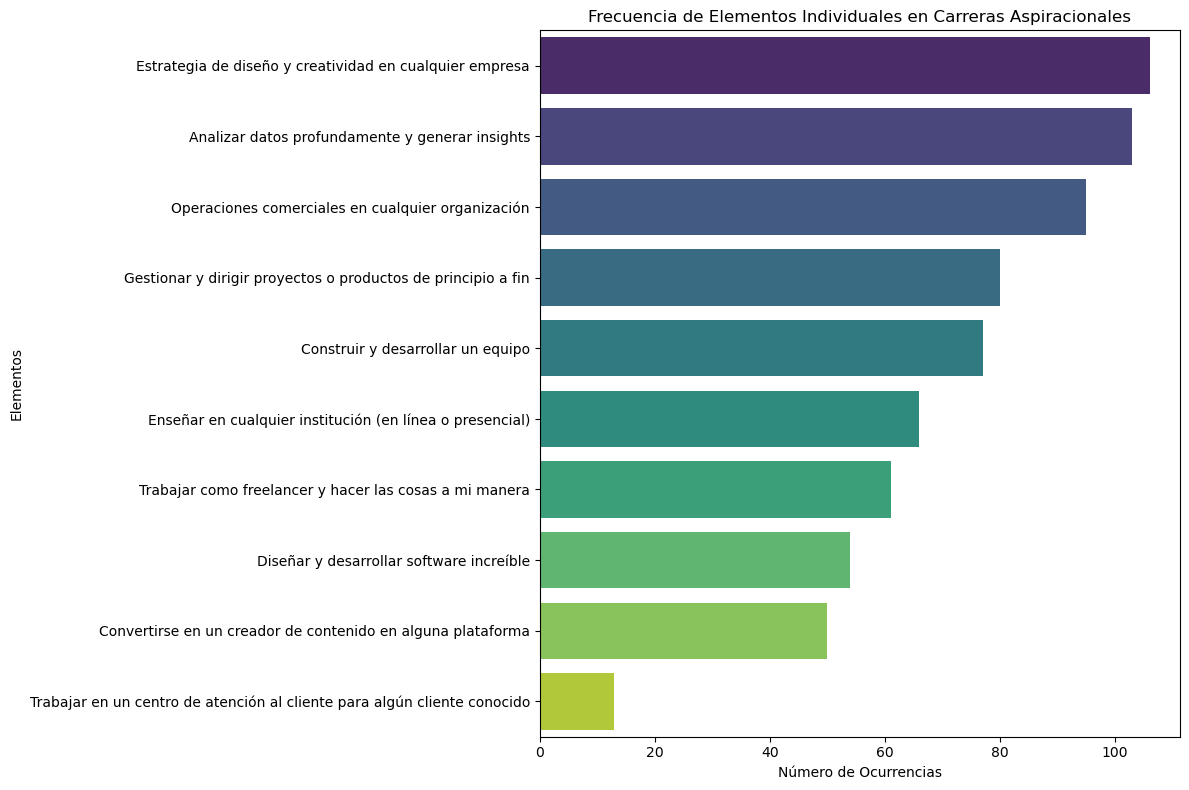

In [46]:
#Graficamos
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar los datos
sns.barplot(x='Count', y='Element', data=element_counts_df, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Frecuencia de Elementos Individuales en Carreras Aspiracionales')
plt.xlabel('Número de Ocurrencias')
plt.ylabel('Elementos')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### 14.- Comlumna 'TipoGerentePreferido' (¿Con qué tipo de gerente trabajarías sin mirar tu reloj ? // 'What type of Manager would you work without looking into your watch ?')

In [47]:
#Vericamos los valores de la columna
df['TipoGerentePreferido'].value_counts()

TipoGerentePreferido
Manager who explains what is expected, sets a goal and helps achieve it    129
Manager who clearly describes what she/he needs                             45
Manager who sets goal and helps me achieve it                               37
Manager who sets targets and expects me to achieve it                       21
Manager who sets unrealistic targets                                         3
Name: count, dtype: int64

In [48]:
# Reemplazar valores 
df['TipoGerentePreferido'] = reemplazar(df,'TipoGerentePreferido')

TipGerPref_counts = df['TipoGerentePreferido'].value_counts()

# Mostrar el DataFrame modificado
print(TipGerPref_counts)

TipoGerentePreferido
Gerente que explica lo que se espera, establece un objetivo y ayuda a alcanzarlo    129
Gerente que describe claramente lo que necesita                                      45
Gerente que establece un objetivo y me ayuda a alcanzarlo                            37
Gerente que establece objetivos y espera que los logre                               21
Gerente que establece objetivos inalcanzables                                         3
Name: count, dtype: int64


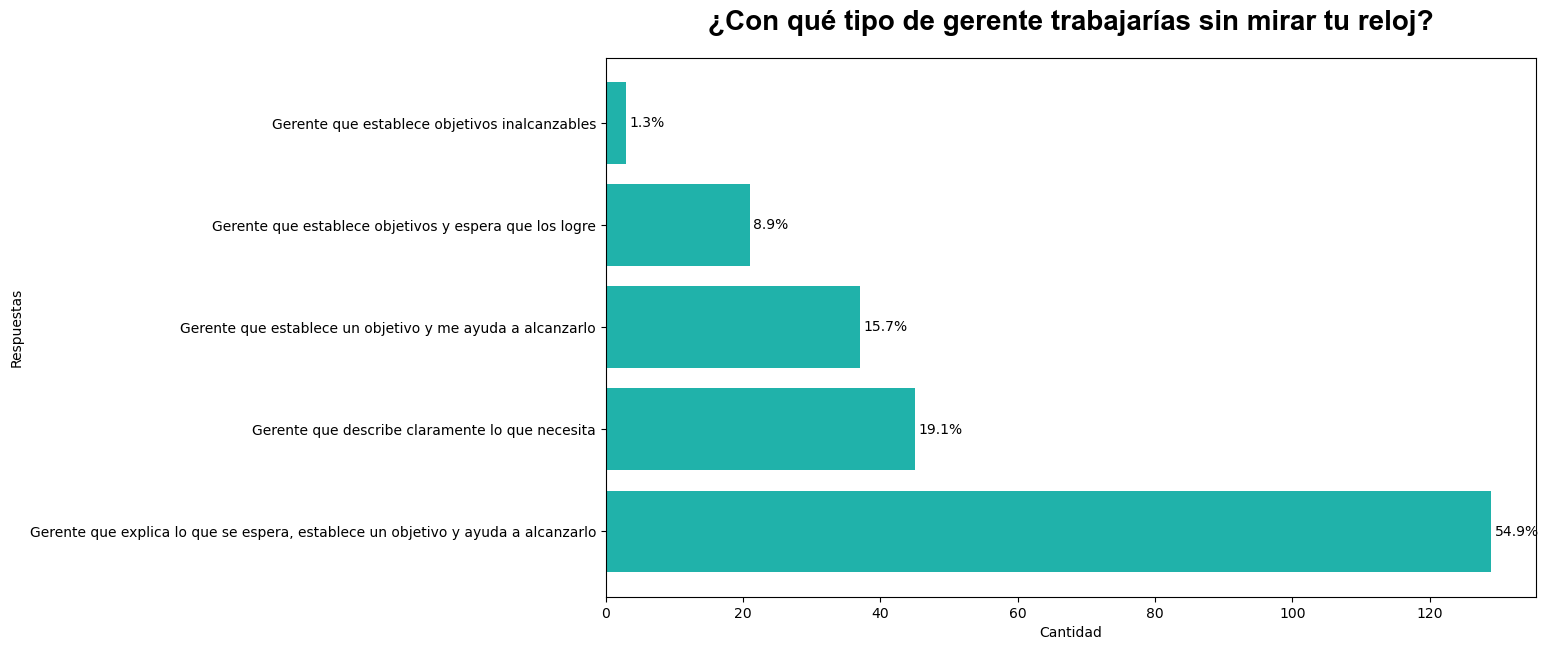

In [49]:
#Graficamos
# Calcular los porcentajes
TipGerPref_percentages = 100 * TipGerPref_counts / TipGerPref_counts.sum()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 7))
bars = plt.barh(TipGerPref_counts.index, TipGerPref_counts.values, color='lightseagreen')

# Añadir las etiquetas de porcentaje a la derecha de cada barra
for bar, percentage in zip(bars, TipGerPref_percentages):
    xval = bar.get_width()
    plt.text(xval + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', ha='left', va='center')

# Configuración del gráfico
plt.xlabel('Cantidad')
plt.ylabel('Respuestas')
plt.title('¿Con qué tipo de gerente trabajarías sin mirar tu reloj?', fontsize=20, fontweight='bold', loc='center', pad=20, style='normal', fontname='Arial')
plt.show()

Los datos indican que los empleados valoran en gran medida la claridad y el apoyo activo de sus gerentes. La capacidad de un gerente para comunicar claramente las expectativas y proporcionar ayuda en la consecución de los objetivos es crucial para la satisfacción y el desempeño de los empleados. Los gerentes que establecen objetivos inalcanzables o que no brindan suficiente apoyo son percibidos negativamente. Por lo tanto, para mejorar el ambiente laboral y la productividad, es recomendable que los gerentes adopten un estilo de liderazgo claro, comunicativo y de apoyo.

### 15.- Columna 'ConfiguracionPreferida' (¿En cuál de las siguientes configuraciones le gustaría trabajar ? // 'Which of the following setup you would like to work ?')

In [50]:
#Vericamos los valores
df['ConfiguracionPreferida'].value_counts()

ConfiguracionPreferida
Work with 5 to 6 people in my team                                                                                                                                           63
Work with 2 to 3 people in my team                                                                                                                                           55
Work with more than 10 people in my team                                                                                                                                     26
Work alone                                                                                                                                                                   16
Work with 7 to 10 or more people in my team                                                                                                                                  15
Work alone, Work with 2 to 3 people in my team                                                   

In [51]:
# Al igual que que en la columna 13 estamos frente una columna mutivariable que con dos elementos separados por como en su interior
# Por lo anterior, aplicamos misma metodologia que contabilizar los valores individuales.

# Aplicar la función a la columna 'CarreraAspiracional'
element_counts = count_individual_elements(df['ConfiguracionPreferida'])

# Crear un DataFrame a partir del diccionario de conteos
element_counts_df = pd.DataFrame(list(element_counts.items()), columns=['Element', 'Count'])

# Ordenar el DataFrame por el conteo en orden descendente
element_counts_df = element_counts_df.sort_values(by='Count', ascending=False)

# Mostrar el DataFrame
print(element_counts_df)

                                       Element  Count
2           Work with 5 to 6 people in my team    104
1           Work with 2 to 3 people in my team    103
0                                   Work alone     52
4     Work with more than 10 people in my team     44
3  Work with 7 to 10 or more people in my team     35


In [52]:
# Reemplazar valores dentro de la columna 'PaisActual' utilizando el diccionario
element_counts_df['Element'] = reemplazar(element_counts_df, 'Element')

# Mostrar el DataFrame modificado
print(element_counts_df)

                                           Element  Count
2         Trabajar con 5 a 6 personas en mi equipo    104
1         Trabajar con 2 a 3 personas en mi equipo    103
0                                    Trabajar solo     52
4     Trabajar con más de 10 personas en mi equipo     44
3  Trabajar con 7 a 10 o más personas en mi equipo     35


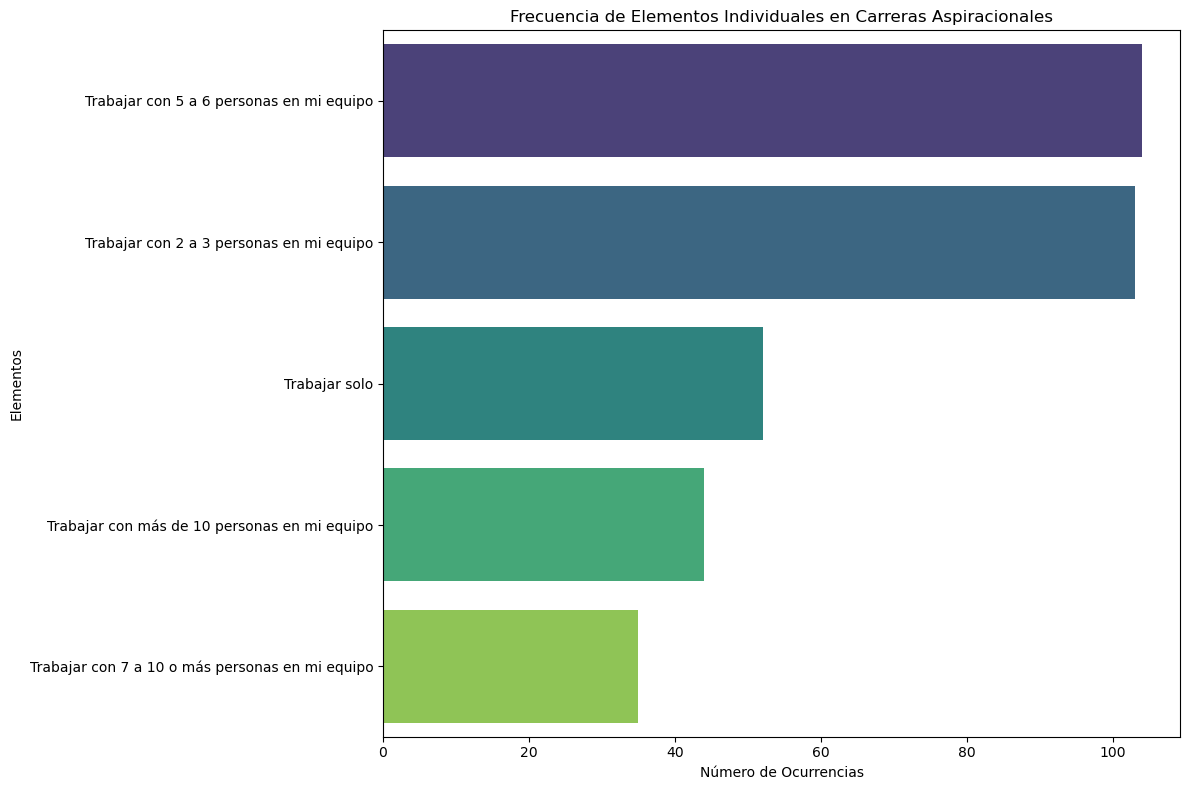

In [53]:
#Graficamos
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar los datos
sns.barplot(x='Count', y='Element', data=element_counts_df, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Frecuencia de Elementos Individuales en Carreras Aspiracionales')
plt.xlabel('Número de Ocurrencias')
plt.ylabel('Elementos')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Basándonos en los datos presentados, parece haber una preferencia general por trabajar en equipos de tamaño moderado, con la opción más popular siendo trabajar con 5 a 6 personas. Esto sugiere que las personas valoran el equilibrio entre la colaboración y la eficiencia que se puede lograr en equipos de tamaño mediano. Sin embargo, también se observa una proporción considerable de personas que prefieren trabajar solas, lo que podría indicar una preferencia por la autonomía y la independencia en el trabajo.

## Analisis de multivariables 

In [54]:
# Creamos una tabla de contingencia para visualizar la columna Genero contra FactoresInfluenciaCarrera
tabla_contingencia = pd.crosstab(df['Genero'], df['FactoresInfluenciaCarrera'])

print(tabla_contingencia)


FactoresInfluenciaCarrera  Influencer con carreras exitosas  Mis Padres  \
Genero                                                                    
Femenino                                                 14          24   
Masculino                                                23          55   

FactoresInfluenciaCarrera  Personas de mi circulo, pero no de mi familia  \
Genero                                                                     
Femenino                                                              12   
Masculino                                                             27   

FactoresInfluenciaCarrera  Personas que cambiaron el mundo para mejor  \
Genero                                                                  
Femenino                                                           18   
Masculino                                                          39   

FactoresInfluenciaCarrera  Redes sociales como LinkedIn  
Genero                                     

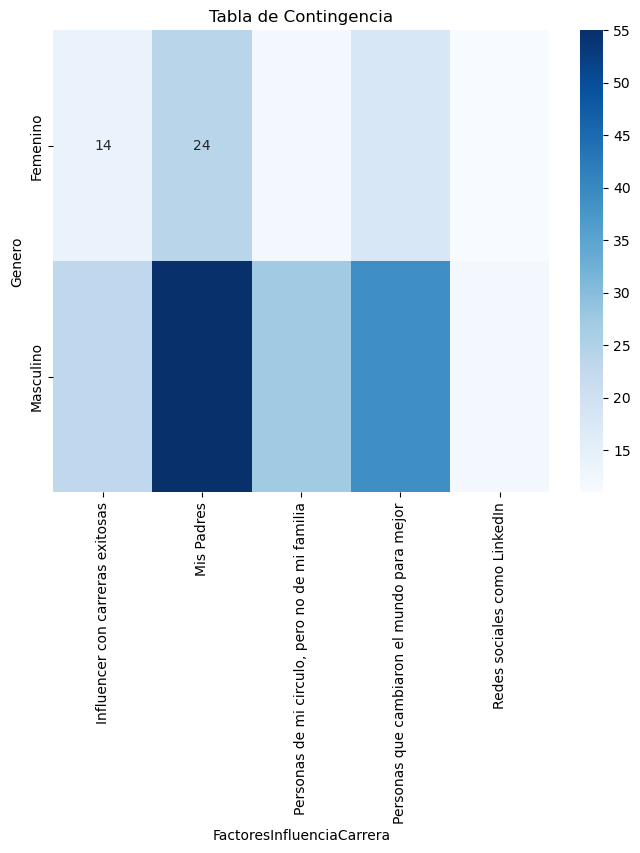

In [55]:
# Graficar la tabla de contingencia usando un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='Blues')
plt.title('Tabla de Contingencia')
plt.show()

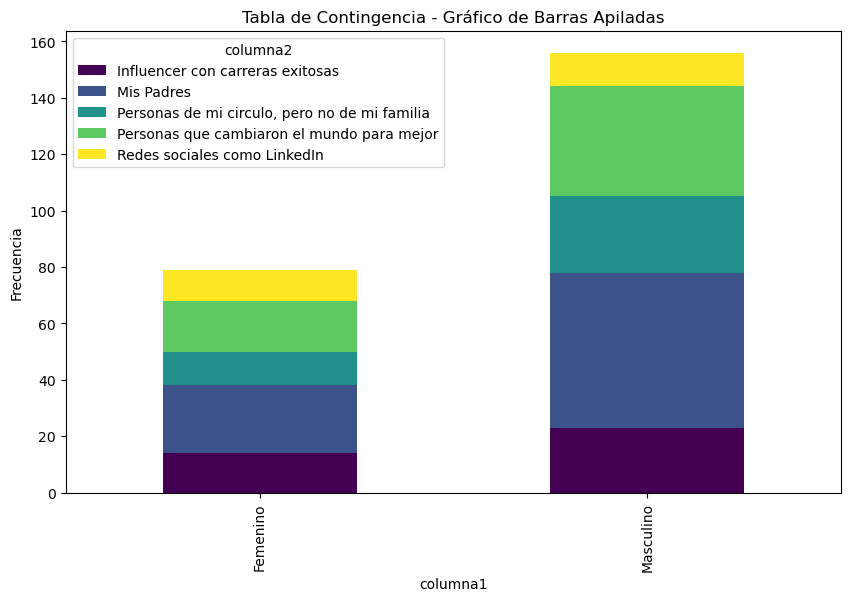

In [56]:
# Graficar la tabla de contingencia usando un gráfico de barras apiladas
tabla_contingencia.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Tabla de Contingencia - Gráfico de Barras Apiladas')
plt.xlabel('columna1')
plt.ylabel('Frecuencia')
plt.legend(title='columna2')
plt.show()

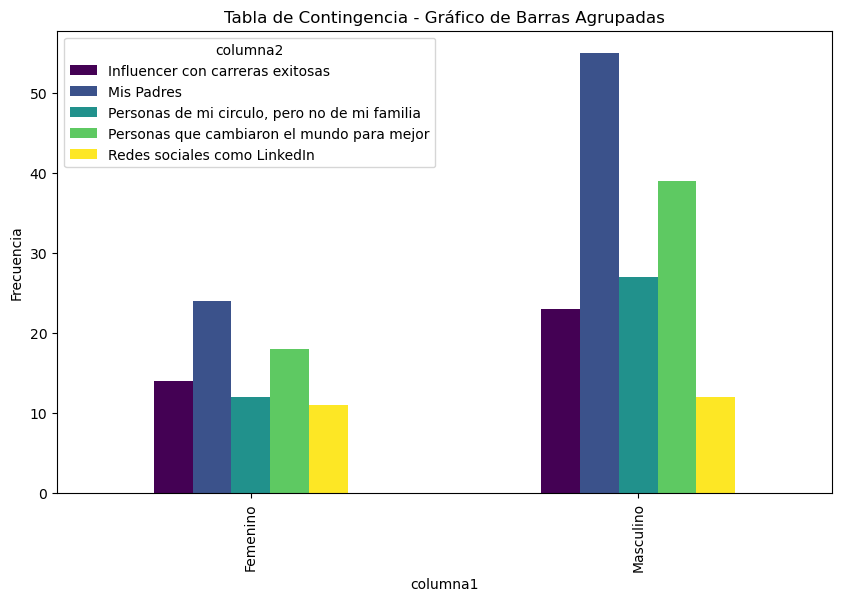

In [57]:
# Graficar la tabla de contingencia usando un gráfico de barras agrupadas
tabla_contingencia.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Tabla de Contingencia - Gráfico de Barras Agrupadas')
plt.xlabel('columna1')
plt.ylabel('Frecuencia')
plt.legend(title='columna2')
plt.show()

### Procesamiento

Guardamos los datos para continuar con el preporcesamiento

In [58]:
import pickle

with open(r'C:\Users\ocata\OneDrive\Desktop\Proyecto7_DS\data\processed\df_eda.pkl', 'wb') as file:
    pickle.dump(df, file)